<div style="text-align: right; font-size: 2em"> <b> FIT1043 Introduction to Data Science </b> </div>
<br>
<div style="text-align: right; font-size: 2em"> <b> Assignment 1 </b> </div>
<br>
<div style="text-align: right"> Lim Yu-Shan </div>
<div style="text-align: right"> 32685467 </div>
<div style="text-align: right"> 30<sup>th</sup> March 2022 </div>

## Introduction  

This is an analysis of life expectancy, population and gross domestic product (GDP) in Southeast Asian countries. The data for life expectancy covers the years from 2000 to 2015 whereas for population and GDP, data from 2019 will be used.    

All data used is sourced from the following three dataset:  
- `LifeExpectancyData-v2.csv`, containing information related to life expectancy and health factors for 193 countries (source: https://www.kaggle.com/kumarajarshi/life-expectancy-who)  
- `2019-GDP.csv`, containing information on the gross domestic product (GDP) for almost all countries in the world for the year 2019 (source: https://datacatalog.worldbank.org/dataset/gdp-ranking)  
- `2020-Population.csv`, containing information on country and region populations from 1950 to 2020 (source: https://population.un.org/wpp/Download/Standard/CSV/)  

## Importing libraries 

The very first step is to import **NumPy** and **pandas**. **NumPy** is a Python library that allows us to create special objects called arrays as well as matrices, and perform mathematical operations on these objects in addition to other useful mathematical features. **pandas**, on the other hand, is an extremely useful library for Python that provides tools for data analysis. By using **pandas**, we are able to directly convert CSV files into clear and concise data structures called *DataFrames*.

For data visualisation, we import the libraries **Matplotlib** and **Seaborn**. **Matplotlib** provides useful tools to visualise data as various graphs and charts. **Seaborn** is another data visualisation library built on top of **Matplotlib**. It allows us to plot graphs and charts using simpler syntax and makes it easier to adjust styles and colours. Most conveniently, since it is based on **Matplotlib**, many **Matplotlib** functions can be used to fine-tune **Seaborn** plots.

We import **NumPy**, **pandas**, **Matplotlib** and **Seaborn** as `np`, `pd`, `plt` and `sns` respectively as they are conventional abbreviations that make it faster to access the features of these libraries (ie. type less code). Only the `pyplot` module of **Matplotlib** is imported. `pyplot` is a module of **Matplotlib** that allows graphs to be plotted using a MATLAB-like interface, albeit with Python code.

Finally, `%matplotlib inline` is executed to make our graphs and charts appear properly in our Jupyter notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Wrangling the data

### Life expectancy

Let us use **pandas** to read `LifeExpectancyData-v2.csv` into a DataFrame called `life_exp`. The **pandas** function to read CSV files is `read_csv`. Since the CSV file is in the folder called `data`, and this notebook file is in the same directory as the folder, the path of the CSV file is `data/LifeExpectancyData-v2.csv`.

`life_exp.info()` gives us some information about the data, including the names of columns.

In [2]:
life_exp = pd.read_csv('data/LifeExpectancyData-v2.csv')

life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2930 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Adult Mortality                  2928 non-null   float64
 6    BMI                             2904 non-null   float64
 7   Alcohol consumption              2744 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12   HIV/AIDS           

Some of the column labels have leading and trailing whitespaces, so we remove them using `strip()`. The stripped labels can then be applied through every column via a for loop that executes the `rename` method with every iteration. `inplace` is `True` for the changes to be permanent. Additionally, the DataFrame is sorted using `sort_values` by `country`, then by `Year`. This gives us the same DataFrame but with the rows in ascending order of year.

Next, we copy this DataFrame into another variable called `life_exp_ori`. We will be making changes to `life_exp` as we continue to wrangle the data, so it is a good idea to keep a copy of the original DataFrame.

In [3]:
for col in life_exp:
    life_exp.rename(columns = {col: col.strip()}, inplace = True)
    
life_exp = life_exp.sort_values(['country', 'Year'])    

life_exp_ori = life_exp

life_exp.head()

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
15,Afghanistan,2000,Developing,54.8,88,321.0,12.2,0.01,62.0,6532,24.0,24.0,0.1,0.338,5.5
14,Afghanistan,2001,Developing,55.3,88,316.0,12.6,0.01,63.0,8762,35.0,33.0,0.1,0.340,5.9
13,Afghanistan,2002,Developing,56.2,88,3.0,13.0,0.01,64.0,2486,36.0,36.0,0.1,0.341,6.2
12,Afghanistan,2003,Developing,56.7,87,295.0,13.4,0.01,65.0,798,41.0,41.0,0.1,0.373,6.5
11,Afghanistan,2004,Developing,57.0,87,293.0,13.8,0.02,67.0,466,5.0,5.0,0.1,0.381,6.8


Now we have a DataFrame that displays detailed information about life expectancies in various countries, with each country having separate entries for different years.  

There is also data for various health and sociocultural factors that contribute to mortality rate. This amount of data is a little overwhelming, so some skimming is necessary.  

Since `Life expectancy` is a responding variable of infant deaths and adult mortality, we can drop the two latter columns. `BMI` is influenced by health factors as well so we can keep that and drop the columns for diseases and alcohol consumption. 

This should give us a subset of the original DataFrame containing the most essential data.

In [4]:
life_exp = life_exp.filter(['country', 'Status', 'Life expectancy', 'BMI',
                            'Income composition of resources', 'Schooling'])
                            
life_exp.head()

,country,Status,Life expectancy,BMI,Income composition of resources,Schooling
15,Afghanistan,Developing,54.8,12.2,0.338,5.5
14,Afghanistan,Developing,55.3,12.6,0.340,5.9
13,Afghanistan,Developing,56.2,13.0,0.341,6.2
12,Afghanistan,Developing,56.7,13.4,0.373,6.5
11,Afghanistan,Developing,57.0,13.8,0.381,6.8


For this assignment, we will only be analysing the data for Southeast Asian countries (including East Timor). Using the `unique` function on a Series returns all the unique country names in this dataset, formatted as a **NumPy** array.

In [5]:
life_exp['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

The names are already arranged neatly in alphabetical order. Referring to [this table](https://en.wikipedia.org/wiki/Southeast_Asia#Sovereign_states), we can easily take note of the names of Southeast Asian countries.

To make our data more viewable, some of the countries' names can be shortened to more conventional versions. We can do this by creating a dictionary mapping each name to its shortened version, then applying it into the `country` column using `replace`.

In [6]:
renames = {'Brunei Darussalam': 'Brunei',
           'Timor-Leste': 'East Timor',
           'Lao People\'s Democratic Republic': 'Laos',
           'Viet Nam': 'Vietnam'
          }

life_exp['country'] = life_exp['country'].replace(renames)

Then, we can create a list containing all Southeast Asian countries including East Timor and obtain a subset of the original DataFrame containing only those countries via the `isin` method, that accepts our list as an argument.

In [7]:
sea = ['Brunei', 'Cambodia', 'East Timor', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

life_exp_sea = life_exp[life_exp['country'].isin(sea)]

life_exp_sea

,country,Status,Life expectancy,BMI,Income composition of resources,Schooling
383,Brunei,Developing,74.4,26.1,0.818,13.4
382,Brunei,Developing,74.7,27.0,0.819,13.4
381,Brunei,Developing,74.8,28.0,0.820,13.3
380,Brunei,Developing,76.0,29.1,0.823,13.4
379,Brunei,Developing,76.4,3.1,0.828,13.7
...,...,...,...,...,...,...
2878,Vietnam,Developing,75.4,14.7,0.655,12.0
2877,Vietnam,Developing,75.6,15.3,0.662,12.2
2876,Vietnam,Developing,75.7,16.0,0.668,12.3
2875,Vietnam,Developing,75.9,16.7,0.675,12.5


We should now audit the data for missing or erroneous values, using `info` and `describe`.

In [8]:
life_exp_sea.info()
life_exp_sea.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 383 to 2874
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          176 non-null    object 
 1   Status                           176 non-null    object 
 2   Life expectancy                  176 non-null    float64
 3   BMI                              176 non-null    float64
 4   Income composition of resources  176 non-null    float64
 5   Schooling                        176 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.6+ KB


,Life expectancy,BMI,Income composition of resources,Schooling
count,176.000000,176.000000,176.000000,176.000000
mean,70.035227,19.828977,0.643858,11.454545
std,6.220933,9.502169,0.140019,2.111325
min,57.700000,1.000000,0.000000,0.000000
25%,65.675000,13.975000,0.540000,10.475000
50%,68.300000,18.300000,0.641000,11.600000
75%,74.600000,27.000000,0.733250,12.725000
max,87.000000,41.200000,0.924000,15.400000


The output of `info` shows 176 non-null objects, which means there are no missing values. However, we deduce from the output of `describe` that there are discrepancies in the data for `BMI`, as evident from its minimum value of 1 (which is a realistically impossible value!). 

One way to approach this is to impute the erroneous data with the mean of the correct data. The strategy is to replace the erroneous values with `NaN` and then set all `NaN` values with the mean using conditional slicing. The intermediate step of replacing these values with `NaN` is to ensure that the calculation of the mean does not include those values.

The lowest `BMI` value that is not obviously erroneous can be found in Vietnam's data ('not obviously' meaning the value fits into the trend of the other values), as shown below:

In [9]:
life_exp_sea[life_exp_sea['country'] == 'Vietnam']

,country,Status,Life expectancy,BMI,Income composition of resources,Schooling
2889,Vietnam,Developing,73.4,9.2,0.569,10.4
2888,Vietnam,Developing,73.6,9.6,0.576,10.6
2887,Vietnam,Developing,73.8,1.0,0.584,10.7
2886,Vietnam,Developing,74.0,1.4,0.592,10.9
2885,Vietnam,Developing,74.2,1.9,0.601,11.0
2884,Vietnam,Developing,74.4,11.3,0.609,11.1
2883,Vietnam,Developing,74.6,11.8,0.618,11.3
2882,Vietnam,Developing,74.7,12.3,0.625,11.4
2881,Vietnam,Developing,74.9,12.9,0.633,11.6
2880,Vietnam,Developing,75.0,13.4,0.641,11.7


Thus, we can define an erroneous `BMI` value as one below 9.2.

Using `loc`, we can slice (by index) all rows where the value of `BMI` is less than 9.2 and (by column) the `BMI` column. Then, using a simple assignment operator, we can set all these values to `np.nan`, which is a **NumPy** constant.

In [10]:
life_exp_sea.loc[life_exp_sea['BMI'] < 9.2, 'BMI'] = np.nan

life_exp_sea

,country,Status,Life expectancy,BMI,Income composition of resources,Schooling
383,Brunei,Developing,74.4,26.1,0.818,13.4
382,Brunei,Developing,74.7,27.0,0.819,13.4
381,Brunei,Developing,74.8,28.0,0.820,13.3
380,Brunei,Developing,76.0,29.1,0.823,13.4
379,Brunei,Developing,76.4,NaN,0.828,13.7
...,...,...,...,...,...,...
2878,Vietnam,Developing,75.4,14.7,0.655,12.0
2877,Vietnam,Developing,75.6,15.3,0.662,12.2
2876,Vietnam,Developing,75.7,16.0,0.668,12.3
2875,Vietnam,Developing,75.9,16.7,0.675,12.5


`life_exp_sea['country'].unique()` returns an array of the country names. Using a for loop, we iterate through each country, calculating the mean `BMI` value for each country (**pandas**'s `mean` method has an argument called `skipna` that is `True` by default, meaning it automatically excludes `NaN` values from calculation).

Then, we replace all `NaN` values for that country with the mean using `loc` and assignment. The by-index slice is all rows with the matching country name **and** where the `BMI` value is `NaN`, which can be easily identified via the `isnull` method. The by-column slice is the `BMI` column.

In [11]:
for c in life_exp_sea['country'].unique():
    mean_bmi = life_exp_sea[life_exp_sea['country'] == c]['BMI'].mean()
    life_exp_sea.loc[(life_exp_sea['country'] == c) & (life_exp_sea['BMI'].isnull()), 'BMI'] = mean_bmi
    
life_exp_sea

,country,Status,Life expectancy,BMI,Income composition of resources,Schooling
383,Brunei,Developing,74.4,26.100000,0.818,13.4
382,Brunei,Developing,74.7,27.000000,0.819,13.4
381,Brunei,Developing,74.8,28.000000,0.820,13.3
380,Brunei,Developing,76.0,29.100000,0.823,13.4
379,Brunei,Developing,76.4,33.442857,0.828,13.7
...,...,...,...,...,...,...
2878,Vietnam,Developing,75.4,14.700000,0.655,12.0
2877,Vietnam,Developing,75.6,15.300000,0.662,12.2
2876,Vietnam,Developing,75.7,16.000000,0.668,12.3
2875,Vietnam,Developing,75.9,16.700000,0.675,12.5


In addition, the values for `Income composition of resources` and `Schooling` for East Timor are 0 for the year 2000.

In [12]:
life_exp_sea[life_exp_sea['country'] == 'East Timor']

,country,Status,Life expectancy,BMI,Income composition of resources,Schooling
2616,East Timor,Developing,58.7,11.9,0.000,0.0
2615,East Timor,Developing,59.4,12.3,0.470,9.8
2614,East Timor,Developing,62.0,12.6,0.475,9.8
2613,East Timor,Developing,61.0,12.9,0.485,9.8
2612,East Timor,Developing,62.3,13.2,0.484,10.2
2611,East Timor,Developing,63.7,13.5,0.492,10.6
2610,East Timor,Developing,64.9,13.9,0.511,11.0
2609,East Timor,Developing,65.8,14.2,0.541,11.3
2608,East Timor,Developing,66.2,14.7,0.566,11.7
2607,East Timor,Developing,66.6,15.1,0.599,12.1


Since this is the first year in the dataset, it is not a good idea to simply impute these values with the mean. A simple look at the DataFrame and we can see that `Income composition of resources` grows at a consistent rate of 0.005 per year whereas `Schooling` remains at a constant value of 9.8 for the first few years. Hence, we can impute the zero values with dummy values of 0.465 and 9.8 respectively.

The `at` property allows quick access of the value in a specific cell of a DataFrame. We can then use assignment to directly replace the value.

In [13]:
life_exp_sea.at[2616, 'Income composition of resources'] = 0.465
life_exp_sea.at[2616, 'Schooling'] = 9.8

life_exp_sea[life_exp_sea['country'] == 'East Timor'].head()

,country,Status,Life expectancy,BMI,Income composition of resources,Schooling
2616,East Timor,Developing,58.7,11.9,0.465,9.8
2615,East Timor,Developing,59.4,12.3,0.470,9.8
2614,East Timor,Developing,62.0,12.6,0.475,9.8
2613,East Timor,Developing,61.0,12.9,0.485,9.8
2612,East Timor,Developing,62.3,13.2,0.484,10.2


Now we have a DataFrame that covers all the core data for Southeast Asian countries. This is useful for observing trends and growth of the data. 

But what if we need a summary? Each country has many entries in the DataFrame, one for each year in the dataset. We can go one step further and obtain aggregated values for each statistic. More specifically, we reorganise the DataFrame so that it shows only the mean values for each statistic. Mean is a good measure of central tendency as its calculation involves every value in the dataset. As the responding variable, life expectancy will also get a column for its max values as well, so that they may be compared with the corresponding mean values.

Since `country` is the set of values we want to separate our data by, we will utilise the `groupby` function to group the data by `country`.

We first create a dictionary of keyword arguments to be passed into the `agg` function. For each entry in the dictionary, the string before the colon is the name of the column to be added. The tuple after the colon contains first the label of the column whose data is to be aggregated, then the function used for aggregation.

The groupby object is then assigned to a new variable called `life_exp_sea_agg`. `as_index` is set to False to prevent the country column from being used as the index of the DataFrame. `agg` is then applied to this DataFrame with the keyword arguments. The characters `**` must be included to denote that our argument is a dictionary of keyword arguments to be unpacked.

In [14]:
fun = {'max_life_expectancy': ('Life expectancy', 'max'), 
       'mean_life_expectancy': ('Life expectancy', 'mean'),
       'mean_BMI': ('BMI', 'mean'), 
       'mean_income_composition_of_resources': ('Income composition of resources', 'mean'),
       'mean_schooling': ('Schooling', 'mean'),      
      }

life_exp_sea_agg = life_exp_sea.groupby(['country'], as_index = False).agg(**fun)

life_exp_sea_agg

,country,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling
0,Brunei,78.3,76.48750,33.442857,0.839375,14.10625
1,Cambodia,68.7,64.34375,15.362500,0.491938,9.87500
2,East Timor,68.3,64.75625,14.550000,0.546687,11.31250
3,Indonesia,69.1,67.55625,21.120000,0.641437,11.61250
4,Laos,65.7,62.38125,16.057143,0.515625,9.23125
5,Malaysia,75.0,73.75625,32.742857,0.749125,12.56250
6,Myanmar,66.6,64.20000,18.100000,0.488250,8.32500
7,Philippines,68.5,67.57500,21.592857,0.650438,11.54375
8,Singapore,87.0,81.47500,31.069231,0.866875,13.98125
9,Thailand,74.9,73.08125,25.946154,0.694688,12.55000


It is a good idea to include `Status` as it can be linked to the numerical statistics in our new DataFrame. 

First, we want to see if any countries changed their status throughout the years. We slice the `life_exp_sea` DataFrame using `iloc`. `[:, 0:2]` means include all rows and include only the first two columns.

In [15]:
life_exp_sea.iloc[:, 0:2]

,country,Status
383,Brunei,Developing
382,Brunei,Developing
381,Brunei,Developing
380,Brunei,Developing
379,Brunei,Developing
...,...,...
2878,Vietnam,Developing
2877,Vietnam,Developing
2876,Vietnam,Developing
2875,Vietnam,Developing


Then, we remove duplicate rows using `drop_duplicates`. If any countries changed their status, they will appear twice in the DataFrame; once with `Developing` status, and once with `Developed` status. Otherwise, there will be as many rows as there are countries.

We also use `sort_values` to reorder the DataFrame by alphabetical order of country names. This is necessary as `Timor-Leste` has been renamed to `East Timor`.

In [16]:
life_exp_sea_status = life_exp_sea.iloc[:, 0:2].drop_duplicates().sort_values('country')

life_exp_sea_status

,country,Status
383,Brunei,Developing
479,Cambodia,Developing
2616,East Timor,Developing
1217,Indonesia,Developing
1441,Laos,Developing
1601,Malaysia,Developing
1795,Myanmar,Developing
2038,Philippines,Developing
2328,Singapore,Developed
2584,Thailand,Developing


So, for the years covered in this dataset, no countries experienced a change in development status. We do not need to worry about this influencing our data. We can now proceed to add the other columns from `life_exp_sea_agg` (using `merge`) to `life_sea_exp_status`, then reassign this complete DataFrame to the the `life_exp_sea_agg` variable. We do not need to pass in any arguments as the `country` column is found in both DataFrames, so **pandas** uses that as the default column to merge on.

In [17]:
life_exp_sea_agg = life_exp_sea_status.merge(life_exp_sea_agg)

life_exp_sea_agg                                      

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling
0,Brunei,Developing,78.3,76.48750,33.442857,0.839375,14.10625
1,Cambodia,Developing,68.7,64.34375,15.362500,0.491938,9.87500
2,East Timor,Developing,68.3,64.75625,14.550000,0.546687,11.31250
3,Indonesia,Developing,69.1,67.55625,21.120000,0.641437,11.61250
4,Laos,Developing,65.7,62.38125,16.057143,0.515625,9.23125
5,Malaysia,Developing,75.0,73.75625,32.742857,0.749125,12.56250
6,Myanmar,Developing,66.6,64.20000,18.100000,0.488250,8.32500
7,Philippines,Developing,68.5,67.57500,21.592857,0.650438,11.54375
8,Singapore,Developed,87.0,81.47500,31.069231,0.866875,13.98125
9,Thailand,Developing,74.9,73.08125,25.946154,0.694688,12.55000


### Population

Now, let us integrate data from other datasets into our DataFrame. Population is a good choice as we can observe how population influences the data we currently have. We import `2020-Population.csv`, a dataset containing populations of countries from 1950 to 2020.

In [18]:
population = pd.read_csv('data/2020-Population.csv')

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 78 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   299 non-null    object
 1   Unnamed: 1   290 non-null    object
 2   Unnamed: 2   290 non-null    object
 3   Unnamed: 3   83 non-null     object
 4   Unnamed: 4   290 non-null    object
 5   Unnamed: 5   290 non-null    object
 6   Unnamed: 6   290 non-null    object
 7   Unnamed: 7   291 non-null    object
 8   Unnamed: 8   290 non-null    object
 9   Unnamed: 9   290 non-null    object
 10  Unnamed: 10  290 non-null    object
 11  Unnamed: 11  290 non-null    object
 12  Unnamed: 12  290 non-null    object
 13  Unnamed: 13  290 non-null    object
 14  Unnamed: 14  290 non-null    object
 15  Unnamed: 15  290 non-null    object
 16  Unnamed: 16  290 non-null    object
 17  Unnamed: 17  290 non-null    object
 18  Unnamed: 18  290 non-null    object
 19  Unnamed: 19  290 non-null    

The dataset looks to be messy. We will have to wrangle it. First, we look at its head.

In [19]:
population.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The head of the DataFrame does not tell us much about the content of the dataset. Let us look at the first 20 rows instead.

In [20]:
population[:20]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,World Population Prospects 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,File POP/1-1: Total population (both sexes com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Estimates, 1950 - 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Thus, we can see the data really only begins starting from row 16, with row 15 being the headers. All the rows above it just contain information about the dataset that we can safely drop.

In [21]:
population = population.drop(index = range(15))

population.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
15,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
16,1,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,2 630 862,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
17,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,3,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,833 720,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
19,4,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,1 797 142,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494


Now, we set the first row of the DataFrame as the headers of the columns. The original row can then be removed from the DataFrame. The column `Index` can also be removed as we will be working with the built-in indexes of the DataFrame.

Since we used row 15 as our column headers, the index of our DataFrame will now have a name called '15'. We remove it using `rename_axis`.

In [22]:
population.columns = population.iloc[0]
population = population.drop(index = 15, columns = 'Index')
population.rename_axis(None, axis = 1, inplace = True)

population.head()

,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,1953,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
16,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,2 630 862,2 677 609,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
17,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,833 720,843 788,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
19,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,1 797 142,1 833 822,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
20,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,203 015,206 986,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438


Again, we only want the data for Southeast Asian countries. We can reuse the code we used above, but let us first rename the label of the column of country/region names to something shorter for convenience. We will only work with countries in the end anyways.

In [23]:
population.rename(columns = {'Region, subregion, country or area *': 'country'}, inplace = True)

population.head()

,Variant,country,Notes,Country code,Type,Parent code,1950,1951,1952,1953,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
16,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,2 630 862,2 677 609,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
17,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,833 720,843 788,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
19,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,1 797 142,1 833 822,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
20,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,203 015,206 986,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438


We use `unique` again to list down the names of countries in an array. We are trying to note the names of Southeast Asian countries and see if they match the conventional versions we used before. Since the names are not in alphabetical order, we can use `np.sort`, which sorts a **NumPy** array and returns a copy.

In [24]:
np.sort(population['country'].unique())

array(['AUSTRALIA/NEW ZEALAND', 'Afghanistan', 'Africa', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'CENTRAL AND SOUTHERN ASIA', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean', 'Cayman Islands',
       'Central African Republic', 'Central America', 'Central Asia',
       'Chad', 'Channel Islands', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Cos

Looks like the names for to this dataset have to be shortened as well. Fortunately, their 'long' versions are the same as the ones from `LifeExpectancyData-v2.csv`. We still have the `renames` dictionary as well as the list of Southeast Asian country names, `sea`, from earlier, which we can safely reuse. 

```
renames = {'Brunei Darussalam': 'Brunei',
           'Timor-Leste': 'East Timor',
           'Lao People\'s Democratic Republic': 'Laos',
           'Viet Nam': 'Vietnam'
          }  

sea = ['Brunei', 'Cambodia', 'East Timor', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore',          'Thailand', 'Vietnam']  
```

Just like before, the necessary country names are shortened using `replace` and `isin` is used to filter out the data for Southeast Asian countries.

For a clean appearance, we also use `reset_index` so the indexes start from 0. `drop` is set to `True` so there would not be a new column for the original indexes added to the DataFrame. The end result is assigned to a new variable called `population_sea`.

Finally, the DataFrame is sorted by `country` as `Timor-Leste` has been renamed to `East Timor`.

In [25]:
population['country'] = population['country'].replace(renames)
population_sea = population[population['country'].isin(sea)].reset_index(drop = True)
population_sea = population_sea.sort_values('country')

population_sea

,Variant,country,Notes,Country code,Type,Parent code,1950,1951,1952,1953,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Estimates,Brunei,NaN,96,Country/Area,920,48,51,54,57,...,394,399,404,410,415,420,424,429,433,437
1,Estimates,Cambodia,NaN,116,Country/Area,920,4 433,4 538,4 656,4 783,...,14 541,14 780,15 026,15 275,15 521,15 766,16 009,16 250,16 487,16 719
9,Estimates,East Timor,NaN,626,Country/Area,920,415,419,423,428,...,1 113,1 133,1 153,1 174,1 196,1 219,1 243,1 268,1 293,1 318
2,Estimates,Indonesia,NaN,360,Country/Area,920,69 543,70 849,72 275,73 821,...,245 116,248 452,251 805,255 128,258 383,261 556,264 651,267 671,270 626,273 524
3,Estimates,Laos,NaN,418,Country/Area,920,1 683,1 723,1 764,1 806,...,6 348,6 445,6 541,6 640,6 741,6 846,6 953,7 061,7 169,7 276
4,Estimates,Malaysia,13,458,Country/Area,920,6 110,6 271,6 450,6 639,...,28 651,29 068,29 469,29 867,30 271,30 685,31 105,31 528,31 950,32 366
5,Estimates,Myanmar,NaN,104,Country/Area,920,17 780,18 104,18 441,18 793,...,50 991,51 414,51 852,52 281,52 681,53 045,53 383,53 708,54 045,54 410
6,Estimates,Philippines,NaN,608,Country/Area,920,18 580,19 247,19 945,20 670,...,95 570,97 213,98 872,100 513,102 113,103 664,105 173,106 651,108 117,109 581
7,Estimates,Singapore,NaN,702,Country/Area,920,1 022,1 068,1 120,1 178,...,5 264,5 369,5 454,5 526,5 592,5 654,5 708,5 758,5 804,5 850
8,Estimates,Thailand,NaN,764,Country/Area,920,20 710,21 263,21 838,22 437,...,67 518,67 836,68 145,68 439,68 715,68 971,69 210,69 428,69 626,69 800


We will be merging data for the gross domestic product (GDP) of each country later. The GDP data is from 2019. Hence, we just need the population values for 2019. Using `filter`, we extract only the country names and values for 2019 from `population_sea`. 

In [26]:
population_sea = population_sea.filter(['country', '2019'])

population_sea

,country,2019
0,Brunei,433
1,Cambodia,16 487
9,East Timor,1 293
2,Indonesia,270 626
3,Laos,7 169
4,Malaysia,31 950
5,Myanmar,54 045
6,Philippines,108 117
7,Singapore,5 804
8,Thailand,69 626


Looks good. But the following output shows otherwise:

In [27]:
population_sea.dtypes

country    object
2019       object
dtype: object

The values of `2019` are strings! This will give us trouble if we attempt to visualise the data later.

Before we convert the strings to integers, we have to remove the whitespaces or Python would not be able to cast them. For this, we use the `apply` function with a lambda expression that replaces all whitespaces with empty strings. Then, the strings can be converted into integers by calling the `to_numeric` function on the `2019` series.

In addition, the values of `2019` are in thousands. This can be easily verified by searching for the exact population of a few of the countries using Google. We prefer to use exact values for our DataFrame, so we can multiply every value in `2019` by 1000.

In [28]:
population_sea['2019'] = population_sea['2019'].apply(lambda x: x.replace(' ', ''))
population_sea['2019'] = pd.to_numeric(population_sea['2019'])
population_sea['2019'] = population_sea['2019'] * 1000

population_sea

,country,2019
0,Brunei,433000
1,Cambodia,16487000
9,East Timor,1293000
2,Indonesia,270626000
3,Laos,7169000
4,Malaysia,31950000
5,Myanmar,54045000
6,Philippines,108117000
7,Singapore,5804000
8,Thailand,69626000


Let us verify that the values have been casted to integers correctly.

In [29]:
population_sea.dtypes

country    object
2019        int64
dtype: object

Now, we merge the DataFrame to `life_exp_sea_agg`, renaming the column `2019` to just `population`. We will reassign this newly combined DataFrame to a new variable called `life_exp_sea_pop`.

In [30]:
population_sea.rename(columns = {'2019': 'population'}, inplace = True)
life_exp_sea_pop = life_exp_sea_agg.merge(population_sea)

life_exp_sea_pop

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling,population
0,Brunei,Developing,78.3,76.48750,33.442857,0.839375,14.10625,433000
1,Cambodia,Developing,68.7,64.34375,15.362500,0.491938,9.87500,16487000
2,East Timor,Developing,68.3,64.75625,14.550000,0.546687,11.31250,1293000
3,Indonesia,Developing,69.1,67.55625,21.120000,0.641437,11.61250,270626000
4,Laos,Developing,65.7,62.38125,16.057143,0.515625,9.23125,7169000
5,Malaysia,Developing,75.0,73.75625,32.742857,0.749125,12.56250,31950000
6,Myanmar,Developing,66.6,64.20000,18.100000,0.488250,8.32500,54045000
7,Philippines,Developing,68.5,67.57500,21.592857,0.650438,11.54375,108117000
8,Singapore,Developed,87.0,81.47500,31.069231,0.866875,13.98125,5804000
9,Thailand,Developing,74.9,73.08125,25.946154,0.694688,12.55000,69626000


### GDP

We can now proceed to integrate the data from `2019-GDP.csv` into our DataFrame.

In [31]:
gdp = pd.read_csv('data/2019-GDP.csv')

gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   229 non-null    object 
 1   Gross domestic product 2019  209 non-null    object 
 2   Unnamed: 2                   0 non-null      float64
 3   Unnamed: 3                   230 non-null    object 
 4   Unnamed: 4                   231 non-null    object 
 5   Unnamed: 5                   8 non-null      object 
dtypes: float64(1), object(5)
memory usage: 11.6+ KB


Again, this dataset will require wrangling from the look of its column labels. We first read its head.

In [32]:
gdp.head()

,Unnamed: 0,Gross domestic product 2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"21,427,700",NaN


Similar to the `2020-Population.csv` file, the head does not tell us much. We will need to look at more of the DataFrame and tidy it up.

In [33]:
gdp.iloc[:20]

,Unnamed: 0,Gross domestic product 2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"21,427,700",NaN
5,CHN,2,NaN,China,"14,342,903",NaN
6,JPN,3,NaN,Japan,"5,081,770",NaN
7,DEU,4,NaN,Germany,"3,845,630",NaN
8,IND,5,NaN,India,"2,875,142",NaN
9,GBR,6,NaN,United Kingdom,"2,827,113",NaN


The columns labelled `Unnamed: 2` and `Unnamed: 5` consist mostly of `NaN` values. We will remove them along with rows 0, 1 and 3, which do not provide meaningful data as well.

In [34]:
gdp = gdp.drop(index = [0, 1, 3], columns = ['Unnamed: 2', 'Unnamed: 5'])

gdp.head()

,Unnamed: 0,Gross domestic product 2019,Unnamed: 3,Unnamed: 4
2,NaN,Ranking,Economy,US dollars)
4,USA,1,United States,"21,427,700"
5,CHN,2,China,"14,342,903"
6,JPN,3,Japan,"5,081,770"
7,DEU,4,Germany,"3,845,630"


Just like we observed in `2020-Population.csv`, the column headers of this DataFrame are in the first row. This row should be set as the column labels of this DataFrame. `rename_axis` is also used as we do not want the index to be labelled.

In [35]:
gdp.columns = gdp.iloc[0]
gdp = gdp.drop(index = 2)
gdp.rename_axis(None, axis = 1, inplace = True)

gdp.head()

,NaN,Ranking,Economy,US dollars)
4,USA,1,United States,"21,427,700"
5,CHN,2,China,"14,342,903"
6,JPN,3,Japan,"5,081,770"
7,DEU,4,Germany,"3,845,630"
8,IND,5,India,"2,875,142"


Now we have column headers, but they still do not make much sense (eg. `Economy` is not a correct label). Using `rename`, we give each column a more accurate name. Based on the original CSV file, the GDP is in millions of US dollars, so we have to mention that in the label as well.

Using `np.nan`, we can directly refer to the `NaN` value and rename it to `country code`. `'NaN': 'country code'` does not work in this case as `NaN` is not a string.

In [36]:
gdp.rename(columns = {np.nan: 'country code',
                      'Economy': 'country',
                      'US dollars)': 'GDP (in millions USD)'},
           inplace = True)

gdp.head()

,country code,Ranking,country,GDP (in millions USD)
4,USA,1,United States,"21,427,700"
5,CHN,2,China,"14,342,903"
6,JPN,3,Japan,"5,081,770"
7,DEU,4,Germany,"3,845,630"
8,IND,5,India,"2,875,142"


To ensure the country names for this dataset match the conventional version, we call `unique` again.

In [37]:
gdp['country'].unique()

array(['United States', 'China', 'Japan', 'Germany', 'India',
       'United Kingdom', 'France', 'Italy', 'Brazil', 'Canada',
       'Russian Federation', 'Korea, Rep.', 'Spain', 'Australia',
       'Mexico', 'Indonesia', 'Netherlands', 'Saudi Arabia', 'Turkey',
       'Switzerland', 'Poland', 'Thailand', 'Sweden', 'Belgium',
       'Argentina', 'Nigeria', 'Austria', 'Iran, Islamic Rep.',
       'United Arab Emirates', 'Norway', 'Israel', 'Ireland',
       'Philippines', 'Singapore', 'Hong Kong SAR, China', 'Malaysia',
       'South Africa', 'Denmark', 'Colombia', 'Egypt, Arab Rep.',
       'Bangladesh', 'Chile', 'Pakistan', 'Finland', 'Vietnam', 'Romania',
       'Czech Republic', 'Portugal', 'Iraq', 'Peru', 'Greece',
       'New Zealand', 'Qatar', 'Kazakhstan', 'Algeria', 'Hungary',
       'Ukraine', 'Kuwait', 'Morocco', 'Ecuador', 'Slovak Republic',
       'Puerto Rico', 'Cuba', 'Ethiopia', 'Kenya', 'Angola',
       'Dominican Republic', 'Sri Lanka', 'Oman', 'Guatemala', 'Myanmar',


We cannot call `np.sort` on this array as it contains both strings and float values (`NaN` is considered a float). `NaN` values are useless in our case anyway, so we remove them from the array.

We use list comprehension to create a list of all country names that are not `NaN` values. `NaN` is a float so we will have to cast every name to a string and compare it with the string `'nan'`. Python's `sorted` function is then used to sort the list.

In [38]:
countries = gdp['country'].unique()
not_nan_countries = [c for c in countries if str(c) != 'nan']

sorted(not_nan_countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe & Central Asia',

Unlike before, we have fewer country names to shorten. Based on the list, the only country names different from the conventional versions that we are using for this assignment is `Brunei Darussalam`, `Timor-Leste` and `Lao PDR`.

We can then reuse the code from before (albeit with changes to `renames`) and obtain a DataFrame called `gdp_sea` that contains GDP data for Southeast Asian countries only.

In [39]:
renames_gdp = {'Brunei Darussalam': 'Brunei',
               'Timor-Leste': 'East Timor',
               'Lao PDR': 'Laos'
              }

gdp['country'] = gdp['country'].replace(renames_gdp)
gdp_sea = gdp[gdp['country'].isin(sea)].reset_index(drop = True)

gdp_sea

,country code,Ranking,country,GDP (in millions USD)
0,IDN,16,Indonesia,"1,119,191"
1,THA,22,Thailand,"543,650"
2,PHL,33,Philippines,"376,796"
3,SGP,34,Singapore,"372,063"
4,MYS,36,Malaysia,"364,702"
5,VNM,45,Vietnam,"261,921"
6,MMR,71,Myanmar,"76,086"
7,KHM,103,Cambodia,"27,089"
8,LAO,117,Laos,"18,174"
9,BRN,133,Brunei,"13,469"


The original DataFrame is sorted by GDP ranking instead of country name. Using `sort_values`, we sort the DataFrame by alphabetical order of the country names.

In [40]:
gdp_sea = gdp_sea.sort_values('country')

gdp_sea

,country code,Ranking,country,GDP (in millions USD)
9,BRN,133,Brunei,"13,469"
7,KHM,103,Cambodia,"27,089"
10,TLS,182,East Timor,"1,674"
0,IDN,16,Indonesia,"1,119,191"
8,LAO,117,Laos,"18,174"
4,MYS,36,Malaysia,"364,702"
6,MMR,71,Myanmar,"76,086"
2,PHL,33,Philippines,"376,796"
3,SGP,34,Singapore,"372,063"
1,THA,22,Thailand,"543,650"


The DataFrame is now in alphabetical order. We reset the indexes so they start from 0, and use `filter` to retain only the `country` and `GDP (in millions USD)` columns, as `GDP (in millions USD)` is the new Series of data that we want to merge into our final DataFrame.

In [41]:
gdp_sea = gdp_sea.reset_index(drop = True).filter(['country', 'GDP (in millions USD)'])

gdp_sea

,country,GDP (in millions USD)
0,Brunei,"13,469"
1,Cambodia,"27,089"
2,East Timor,"1,674"
3,Indonesia,"1,119,191"
4,Laos,"18,174"
5,Malaysia,"364,702"
6,Myanmar,"76,086"
7,Philippines,"376,796"
8,Singapore,"372,063"
9,Thailand,"543,650"


Almost there! Let us look at the data type of `GDP (in millions USD)`.

In [42]:
gdp_sea.dtypes

country                  object
GDP (in millions USD)    object
dtype: object

As expected, they are strings. We will have to convert them to integers.

Just like before, the `apply` function is used in tandem with a lambda expression. The strings now contain commas instead of whitespaces to separate every three digits, so we replace the commas with empty strings.

The strings can then be casted to integers using `to_numeric`.

In [43]:
gdp_sea['GDP (in millions USD)'] = gdp_sea['GDP (in millions USD)'].apply(lambda x: x.replace(',', ''))
gdp_sea['GDP (in millions USD)'] = pd.to_numeric(gdp_sea['GDP (in millions USD)'])

gdp_sea

,country,GDP (in millions USD)
0,Brunei,13469
1,Cambodia,27089
2,East Timor,1674
3,Indonesia,1119191
4,Laos,18174
5,Malaysia,364702
6,Myanmar,76086
7,Philippines,376796
8,Singapore,372063
9,Thailand,543650


To confirm that the casts have been performed correctly:

In [44]:
gdp_sea.dtypes

country                  object
GDP (in millions USD)     int64
dtype: object

Now we can merge the data for GDP to `life_exp_sea_pop`. We will call this DataFrame `life_exp_sea_pop_gdp`.

In [45]:
life_exp_sea_pop_gdp = life_exp_sea_pop.merge(gdp_sea)

life_exp_sea_pop_gdp

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling,population,GDP (in millions USD)
0,Brunei,Developing,78.3,76.48750,33.442857,0.839375,14.10625,433000,13469
1,Cambodia,Developing,68.7,64.34375,15.362500,0.491938,9.87500,16487000,27089
2,East Timor,Developing,68.3,64.75625,14.550000,0.546687,11.31250,1293000,1674
3,Indonesia,Developing,69.1,67.55625,21.120000,0.641437,11.61250,270626000,1119191
4,Laos,Developing,65.7,62.38125,16.057143,0.515625,9.23125,7169000,18174
5,Malaysia,Developing,75.0,73.75625,32.742857,0.749125,12.56250,31950000,364702
6,Myanmar,Developing,66.6,64.20000,18.100000,0.488250,8.32500,54045000,76086
7,Philippines,Developing,68.5,67.57500,21.592857,0.650438,11.54375,108117000,376796
8,Singapore,Developed,87.0,81.47500,31.069231,0.866875,13.98125,5804000,372063
9,Thailand,Developing,74.9,73.08125,25.946154,0.694688,12.55000,69626000,543650


Now that we have for the population of Southeast Asian countries as well as their GDP in 2019, we can now compute an additional metric: GDP per capita. The formula is simply GDP divided by population.

In [46]:
life_exp_sea_pop_gdp['perCapitaGDP'] = life_exp_sea_pop_gdp['GDP (in millions USD)'] / life_exp_sea_pop_gdp['population']

life_exp_sea_pop_gdp

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling,population,GDP (in millions USD),perCapitaGDP
0,Brunei,Developing,78.3,76.48750,33.442857,0.839375,14.10625,433000,13469,0.031106
1,Cambodia,Developing,68.7,64.34375,15.362500,0.491938,9.87500,16487000,27089,0.001643
2,East Timor,Developing,68.3,64.75625,14.550000,0.546687,11.31250,1293000,1674,0.001295
3,Indonesia,Developing,69.1,67.55625,21.120000,0.641437,11.61250,270626000,1119191,0.004136
4,Laos,Developing,65.7,62.38125,16.057143,0.515625,9.23125,7169000,18174,0.002535
5,Malaysia,Developing,75.0,73.75625,32.742857,0.749125,12.56250,31950000,364702,0.011415
6,Myanmar,Developing,66.6,64.20000,18.100000,0.488250,8.32500,54045000,76086,0.001408
7,Philippines,Developing,68.5,67.57500,21.592857,0.650438,11.54375,108117000,376796,0.003485
8,Singapore,Developed,87.0,81.47500,31.069231,0.866875,13.98125,5804000,372063,0.064105
9,Thailand,Developing,74.9,73.08125,25.946154,0.694688,12.55000,69626000,543650,0.007808


Our GDP columns was in millions of USD. Upon dividing by population, we get float values with too many leading zeroes. This makes the data hard to interpret. We can simply multiply each value by 1 million to get the exact figures. We will also rename the column for clarity.

In [47]:
life_exp_sea_pop_gdp['perCapitaGDP'] = life_exp_sea_pop_gdp['perCapitaGDP'] * 1000000
life_exp_sea_pop_gdp.rename(columns = {'perCapitaGDP': 'perCapitaGDP (in USD)'}, inplace = True)

life_exp_sea_pop_gdp

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling,population,GDP (in millions USD),perCapitaGDP (in USD)
0,Brunei,Developing,78.3,76.48750,33.442857,0.839375,14.10625,433000,13469,31106.235566
1,Cambodia,Developing,68.7,64.34375,15.362500,0.491938,9.87500,16487000,27089,1643.052102
2,East Timor,Developing,68.3,64.75625,14.550000,0.546687,11.31250,1293000,1674,1294.663573
3,Indonesia,Developing,69.1,67.55625,21.120000,0.641437,11.61250,270626000,1119191,4135.563471
4,Laos,Developing,65.7,62.38125,16.057143,0.515625,9.23125,7169000,18174,2535.081601
5,Malaysia,Developing,75.0,73.75625,32.742857,0.749125,12.56250,31950000,364702,11414.773083
6,Myanmar,Developing,66.6,64.20000,18.100000,0.488250,8.32500,54045000,76086,1407.826811
7,Philippines,Developing,68.5,67.57500,21.592857,0.650438,11.54375,108117000,376796,3485.076352
8,Singapore,Developed,87.0,81.47500,31.069231,0.866875,13.98125,5804000,372063,64104.583046
9,Thailand,Developing,74.9,73.08125,25.946154,0.694688,12.55000,69626000,543650,7808.146382


But now there are way too many decimal places! We can truncate them using `round`, a **pandas** function that rounds numbers to the desired number of decimal places. For readability, we are going with 2 decimal places and will apply it to all float values in the DataFrame.

We will iterate through every column using a for loop. If the datatype of the column is a **NumPy** float, the `round` function is applied.

After this cell, we get the final DataFrame.

In [48]:
for col in life_exp_sea_pop_gdp:
    if life_exp_sea_pop_gdp[col].dtype == np.float64:
        life_exp_sea_pop_gdp[col] = life_exp_sea_pop_gdp[col].round(2)
    
life_exp_sea_pop_gdp

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling,population,GDP (in millions USD),perCapitaGDP (in USD)
0,Brunei,Developing,78.3,76.49,33.44,0.84,14.11,433000,13469,31106.24
1,Cambodia,Developing,68.7,64.34,15.36,0.49,9.88,16487000,27089,1643.05
2,East Timor,Developing,68.3,64.76,14.55,0.55,11.31,1293000,1674,1294.66
3,Indonesia,Developing,69.1,67.56,21.12,0.64,11.61,270626000,1119191,4135.56
4,Laos,Developing,65.7,62.38,16.06,0.52,9.23,7169000,18174,2535.08
5,Malaysia,Developing,75.0,73.76,32.74,0.75,12.56,31950000,364702,11414.77
6,Myanmar,Developing,66.6,64.20,18.10,0.49,8.32,54045000,76086,1407.83
7,Philippines,Developing,68.5,67.58,21.59,0.65,11.54,108117000,376796,3485.08
8,Singapore,Developed,87.0,81.47,31.07,0.87,13.98,5804000,372063,64104.58
9,Thailand,Developing,74.9,73.08,25.95,0.69,12.55,69626000,543650,7808.15


### Interpreting the data

Of the 11 Southeast Asian countries in this study, Singapore is the only country with `Developed` status. Hence, it is no surprise that Singapore has the highest values of `max_life_expectancy` (87.0) and `mean_life_expectancy` (81.47). In contrast, Laos has lowest values of both `max_life_expectancy` (65.7) and `mean_life_expectancy` (62.38). Interestingly, it can be noted that countries in the centre of Southeast Asia (eg. Singapore, Brunei, Malaysia) generally have higher life expectancies than those in the north and south (eg. Laos, Indonesia, East Timor). For the north, this can probably be explained by regular instability, such as famine and war. Indonesia takes up most of the south, so its large population may contribute to the calculation of a lower life expectancy.

Based on information from [the NHS](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/), the values of `mean_BMI` calculated from this dataset are quite unrealistic. It is highly like the `BMI` values in the original dataset are inaccurate. For example, the mean BMI of the Vietnamese population is 13.44, a severely low figure.

`mean_income_composition_of_resources` seems to have strong correlation with `mean_schooling` and `perCapitaGDP`, as well as `mean_life_expectancy`. This makes sense as higher schooling increases the number of educated citizens, which in turn increases the mean income composition of resources. High income composition of resources will then lead to higher GDP per capita, giving the citizens of the country better quality of life and thus longer life expectancy.  

## Question 1

This question requires us to visualise expected life expectancies in Southeast Asia based on country status (Developing or Developed). We use **Seaborn** to create a barplot for this, as **Seaborn** makes it easier for us to display the values above each bar. Furthermore, **Seaborn** automatically takes the mean of all mean life expectancies of developing countries and uses it as the value for the bar chart. Thus, no extra calculation is needed.

Since **Seaborn** is built on top of **Matplotlib**, we can use **Matplotlib**'s `figure` function to create a blank figure with a specified size, the `title` function to set the title of the graph, then call **Seaborn**'s `barplot` function to plot the bars. `ci`, or confidence intervals, is set to `None` as we do not need to display them in this scenario.

When the bar chart is plotted, the values are stored in an object created by **Matplotlib** called `containers`. We can then display the values of each bar by passing the first element of `containers` into the `bar_label` function.

Finally, `set_ylabel` is used to display a clear y-axis label with the unit in parantheses.

In [49]:
# this code sets the visual theme for all plots to Seaborn's default theme rather than Matplotlib's
# Seaborn's theme has dark grids and softer colours which makes the plot more readable
sns.set_theme()

<AxesSubplot:title={'center':'Mean life expectancies for developing and developed countries in Southeast Asia from 2000 to 2015'}, xlabel='Status', ylabel='Mean life expectancy (years)'>

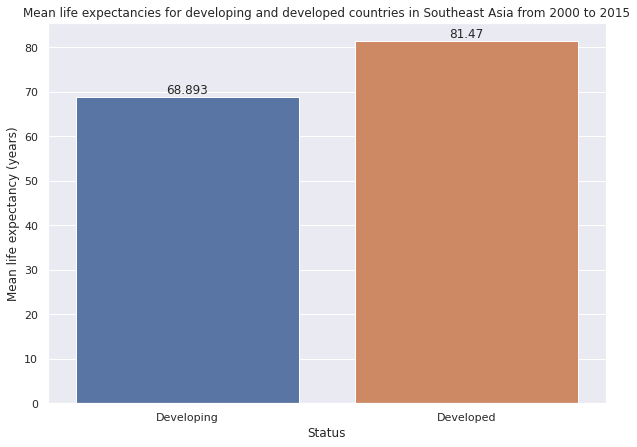

In [50]:
q1 = plt.figure(figsize = (10, 7))
q1 = plt.title('Mean life expectancies for developing and developed countries in Southeast Asia from 2000 to 2015')
q1 = sns.barplot(x = 'Status', y = 'mean_life_expectancy', data = life_exp_sea_pop_gdp, ci = None)
q1.bar_label(q1.containers[0])
q1.set_ylabel('Mean life expectancy (years)')

q1

### Insight

A bar chart is chosen to visualise and compare the expected life expectancies for developing and developed countries in Southeast Asia, since the data involved is categorical. A bar chart can give us a straightforward comparison of the data. The mean was chosen as the aggregation to represent expected life expectancies as it is a measure of central tendency. Values are more likely to occur the closer they are to the mean, so it gives us an idea of what values to 'expect' in a sample or population.

The 'mean life expectancy for developing countries' is the mean of all mean life expectancies for developing countries as shown in the DataFrame `life_exp_sea_pop_gdp`. Since Singapore is the only developed country in Southeast Asia, the 'mean life expectancy for developed countries' is simply the mean life expectancy for Singapore. From the graph, the former value is 68.893 years whereas the latter is 81.47 years.

Thus, the insight we gain is that the difference between life expectancies for developing and developed countries in Southeast Asia is quite large (about 12.58 years). However, due to the fact that there are 10 developing countries and only one developed country, it is not a fair representation of the difference in life expectancies for developing and developed countries in general.

## Question 2

Now we need to create a bar graph with countries on the x-axis, and side-by-side bars for population, mean life
expectancy and adult mortality. We have dropped the data for adult mortality earlier on, but we can restore it easily. If you remember, we have kept a copy of the original DataFrame in `life_exp_ori`. Using the `concat` function, we can slice the `country` and `Adult Mortality` columns from `life_exp_ori` and concatenate them to get a 2-column DataFrame.

The approach to handling this DataFrame is similar to what we did before. We use `replace` with the `renames` dictionary to shorten the country names, and remove all rows except those for Southeast Asian countries. We then audit the data using `info` and `describe`.

In [51]:
adult_mort = pd.concat([life_exp_ori['country'], life_exp_ori['Adult Mortality']], axis = 1)
adult_mort['country'] = adult_mort['country'].replace(renames)
adult_mort = adult_mort[adult_mort['country'].isin(sea)]

adult_mort.info()
adult_mort.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 383 to 2874
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          176 non-null    object 
 1   Adult Mortality  176 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


,Adult Mortality
count,176.000000
mean,148.846591
std,75.842350
min,1.000000
25%,84.000000
50%,158.000000
75%,213.250000
max,296.000000


There are no missing values but there is definitely some erroneous data, as evident from the minimum value of 1.

We can use the same strategy we used to remove the erroneous `BMI` values from `life_exp_sea`, but adult mortality is a metric that can be very different in each country, and it can change in large intervals. It is not easy to find the erroneous data.

A quick and dirty way is to replace all outliers with the mean of non-outlier values for each country. Outliers can be defined as any value below the lower quartile subtracted by 1.5 times the interquartile range, or above the upper quartile subtracted by 1.5 times the interquartile range*.

Since `Adult Mortality` will have to be used **Question 3**, we save a 

\* Source: https://www.thoughtco.com/what-is-an-outlier-3126227

In [52]:
for c in adult_mort['country'].unique():
    upper = adult_mort[adult_mort['country'] == c].quantile(0.75)['Adult Mortality'] 
    lower = adult_mort[adult_mort['country'] == c].quantile(0.25)['Adult Mortality']
    outlier = 1.5 * (upper - lower)
    
    adult_mort.loc[(adult_mort['country'] == c) & (adult_mort['Adult Mortality'] < lower - outlier), 'Adult Mortality'] = np.nan
    adult_mort.loc[(adult_mort['country'] == c) & (adult_mort['Adult Mortality'] > upper + outlier), 'Adult Mortality'] = np.nan
    
    mean_am = adult_mort[adult_mort['country'] == c]['Adult Mortality'].mean()
    adult_mort.loc[(adult_mort['country'] == c) & (adult_mort['Adult Mortality'].isnull()), 'Adult Mortality'] = mean_am

adult_mort

,country,Adult Mortality
383,Brunei,85.750000
382,Brunei,85.750000
381,Brunei,95.000000
380,Brunei,89.000000
379,Brunei,89.000000
...,...,...
2878,Vietnam,131.000000
2877,Vietnam,134.133333
2876,Vietnam,129.000000
2875,Vietnam,128.000000


We then create a groupby object based on `country` and aggregate the values of `Adult Mortality` to mean values. Finally, `Adult Mortality` is renamed to `mean_adult_mortality`.

In [53]:
adult_mort_agg = adult_mort.groupby(['country'], as_index = False).agg('mean')
adult_mort_agg.rename(columns = {'Adult Mortality': 'mean_adult_mortality'}, inplace = True)

Now that `life_exp_sea_pop_gdp` and `adult_mort_agg` share an identical `country` column, they can be merged easily. We assign this new DataFrame to the variable `q2_df` so the unmerged version is not overwritten.

In [54]:
q2_df = life_exp_sea_pop_gdp.merge(adult_mort_agg)

q2_df

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling,population,GDP (in millions USD),perCapitaGDP (in USD),mean_adult_mortality
0,Brunei,Developing,78.3,76.49,33.44,0.84,14.11,433000,13469,31106.24,85.750000
1,Cambodia,Developing,68.7,64.34,15.36,0.49,9.88,16487000,27089,1643.05,221.357143
2,East Timor,Developing,68.3,64.76,14.55,0.55,11.31,1293000,1674,1294.66,169.909091
3,Indonesia,Developing,69.1,67.56,21.12,0.64,11.61,270626000,1119191,4135.56,185.692308
4,Laos,Developing,65.7,62.38,16.06,0.52,9.23,7169000,18174,2535.08,236.923077
5,Malaysia,Developing,75.0,73.76,32.74,0.75,12.56,31950000,364702,11414.77,132.384615
6,Myanmar,Developing,66.6,64.20,18.10,0.49,8.32,54045000,76086,1407.83,154.312500
7,Philippines,Developing,68.5,67.58,21.59,0.65,11.54,108117000,376796,3485.08,218.071429
8,Singapore,Developed,87.0,81.47,31.07,0.87,13.98,5804000,372063,64104.58,65.733333
9,Thailand,Developing,74.9,73.08,25.95,0.69,12.55,69626000,543650,7808.15,170.000000


In order to visualise the values for `population`, `mean_life_expectancy` and `mean_adult_mortality` in a side-by-side bar chart, we will need to unpivot these columns (ie. convert them from 'wide' to 'long'). This can be done with **pandas**'s `melt` function.

Since `country` is our categorical values, it is set as the sole identifier variable, whereas the three variables we want to represent are the value variables. The 'melted' DataFrame is assigned to a new variable called `melted`.

We also rename the column labels and the names of each statistic for consistency in capitalisation and to show the units in parentheses.

In [55]:
melted = pd.melt(q2_df, id_vars = 'country',
                 value_vars = ['population', 'mean_life_expectancy', 'mean_adult_mortality'])

melted.rename(columns = {'country': 'Country',
                         'variable': 'Statistic',
                         'value': 'Value'},
              inplace = True)

melted['Statistic'].replace({'population': 'Population',
                             'mean_life_expectancy': 'Mean life expectancy (years)',
                             'mean_adult_mortality': 'Mean adult mortality (per 1000 population)'},
                             inplace = True)

melted

,Country,Statistic,Value
0,Brunei,Population,4.330000e+05
1,Cambodia,Population,1.648700e+07
2,East Timor,Population,1.293000e+06
3,Indonesia,Population,2.706260e+08
4,Laos,Population,7.169000e+06
5,Malaysia,Population,3.195000e+07
6,Myanmar,Population,5.404500e+07
7,Philippines,Population,1.081170e+08
8,Singapore,Population,5.804000e+06
9,Thailand,Population,6.962600e+07


Now we can use **Seaborn** to create a barplot of `melted`, where `country` is on the x-axis, `value` is on the y-axis, and `hue` is set to `variable` so we get side-by-side multicoloured bars, each representing a different variable for that country.

<AxesSubplot:title={'center':'Population, mean life expectancy and mean adult mortality of countries in Southeast Asia'}, xlabel='Country', ylabel='Value'>

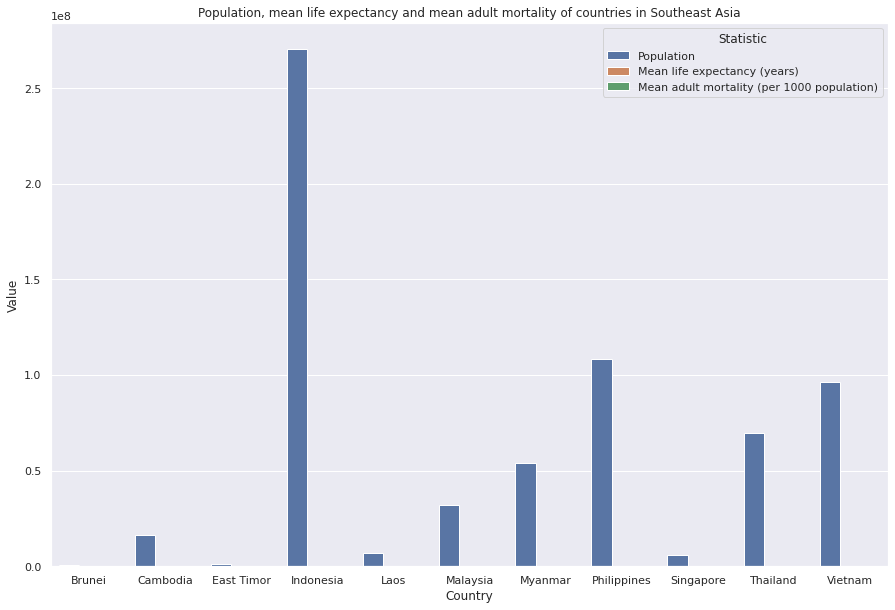

In [56]:
q2 = plt.figure(figsize = (15, 10))
q2 = plt.title('Population, mean life expectancy and mean adult mortality of countries in Southeast Asia')
q2 = sns.barplot(x = 'Country', y = 'Value', hue = 'Statistic', data = melted)

q2

Notice how the orange and green bars are not visible. This is because the values for `population` are too large relative to that of the other two variables. To shorten this disparity between numbers, we can represent the values of `population` in millions instead.

A new column called `population (in millions)` is created, containing the values of `population` divided by 1 million. Then, we do the same melting process with `population (in millions)` replacing `population`.

In [57]:
melted.loc[melted['Statistic'] == 'Population', 'Value'] /= 1000000
melted['Statistic'].replace('Population', 'Population (in millions)', inplace = True)

melted

,Country,Statistic,Value
0,Brunei,Population (in millions),0.433000
1,Cambodia,Population (in millions),16.487000
2,East Timor,Population (in millions),1.293000
3,Indonesia,Population (in millions),270.626000
4,Laos,Population (in millions),7.169000
5,Malaysia,Population (in millions),31.950000
6,Myanmar,Population (in millions),54.045000
7,Philippines,Population (in millions),108.117000
8,Singapore,Population (in millions),5.804000
9,Thailand,Population (in millions),69.626000


The same code is used to recreate the bar graph, albeit with the figure size increased. This will be explained later.

<AxesSubplot:title={'center':'Population, mean life expectancy and mean adult mortality of countries in Southeast Asia'}, xlabel='Country', ylabel='Value'>

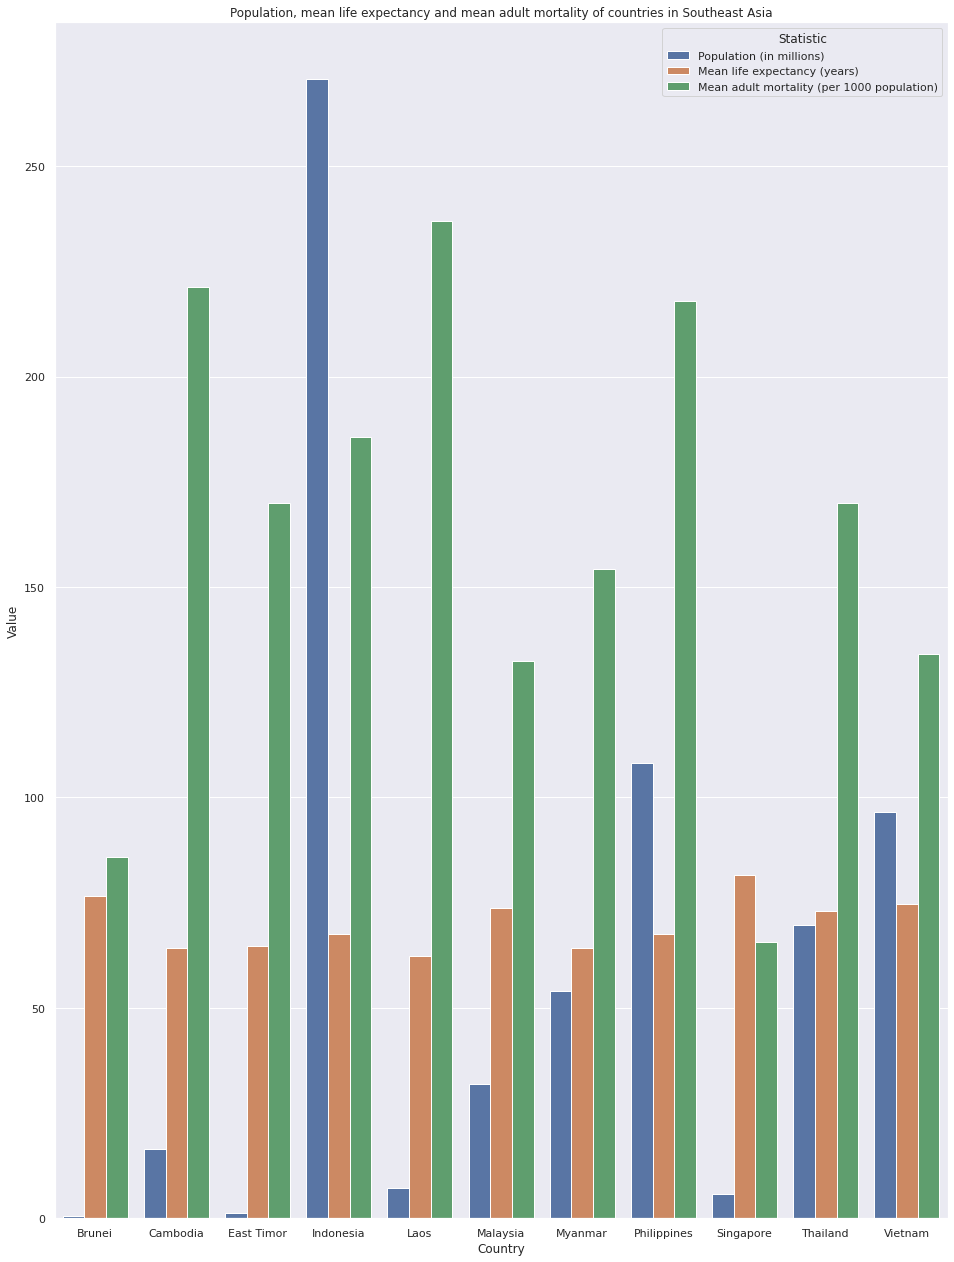

In [58]:
q2 = plt.figure(figsize = (16, 22))
q2 = plt.title('Population, mean life expectancy and mean adult mortality of countries in Southeast Asia')
q2 = sns.barplot(x = 'Country', y = 'Value', hue = 'Statistic', data = melted)

q2

Now we have a much better bar graph that visualises the values of population, mean life expectancy and mean adult mortality.   

### The problem

Unfortunately, the data presented in this graph is not very appropriate. It does not really give much insight at all, and could be misleading to readers.

This is due to the difference in units. Population is a discrete and unitless statistic, whereas mean life expectancy is continuous and measured in years. Mean adult mortality is also discrete and unitless. It may seem like it can be linked closely to population, but mean adult mortality in this graph is measured per 1000 population. This is why the graph can be misleading. In order to accommodate the huge range of population values, it has to be visualised in millions while mean adult mortality remains visualised in thousands. It is tough to study the relationship between population and mean adult mortality from the graph this way.

Hence, it is not a good idea to represent these three metrics in a side-by-side bar chart. The ranges of each metric vary greatly, so adjustment of units is required. Sometimes, even adjustment of units cannot enable extreme values to be shown clearly in a standard sized figure. For example, the `22` in `figsize = (16, 22)` (ie. the height of the plot in inches) is the bare minimum required to show a miniscule bar for the population of Brunei.

An appropriate side-by-side bar chart for this dataset would be one comparing the values `mean_life_expectancy` and `max_life_expectancy`, or one that cmpares the values of `GDP` and `perCapitaGDP`.

## Question 3

For this question, we require the non-aggregated data from `LifeExpectancyData-v2.csv`, as we will be visualising the changes in statistics over a duration of years specific to a single country - Singapore.

The non-aggregated data we need is readily available in the DataFrame `life_exp_sea`, but it is missing the `Year` column. We can use `merge` to combine the Singapore section of `life_exp_sea` with the `Year` column from `life_exp_ori`. The `Year` column alone does not share any columns with `life_exp_sea`, but both still share the same indexes since `life_exp_sea` was extracted from `life_exp`. Thus, we set both `left_index` and `right_index` as `True` so **pandas** knows to join them by using the indexes as the key. We assign this new DataFrame to a variable called `sg`.

We will be investigating `Adult Mortality` and `infant deaths`, so `sg` is merged with the `Adult Mortality` column from `adult_mort`, also using the indexes as the key.


The data for infant deaths is available in the `life_exp_ori` DataFrame. We can subset the Singapore part of this DataFrame and assign it to a temporary variable called `sg_ori` so the next line of code is not too long. `sg` is then merged with the `tnfant deaths` column of `sg_ori`, also on the indexes.

The rename function is then used to create some consistency with capitalisation in the column labels, and the `sg` DataFrame is complete.

In [59]:
sg = life_exp_sea[life_exp_sea['country'] == 'Singapore'].merge(life_exp_ori['Year'],
                                                                left_index = True,
                                                                right_index = True)

sg = sg.merge(adult_mort['Adult Mortality'], left_index = True, right_index = True)

sg_ori = life_exp_ori[life_exp_ori['country'] == 'Singapore']
sg = sg.merge(sg_ori['infant deaths'], left_index = True, right_index = True)

sg.rename(columns = {'Adult Mortality': 'Adult mortality',
                     'infant deaths': 'Infant deaths'},
          inplace = True)

sg

,country,Status,Life expectancy,BMI,Income composition of resources,Schooling,Year,Adult mortality,Infant deaths
2328,Singapore,Developed,78.3,28.500000,0.810,12.5,2000,78.000000,0
2327,Singapore,Developed,78.7,28.900000,0.820,12.7,2001,76.000000,0
2326,Singapore,Developed,79.0,29.200000,0.818,12.6,2002,74.000000,0
2325,Singapore,Developed,79.3,29.600000,0.819,12.7,2003,73.000000,0
2324,Singapore,Developed,79.7,29.900000,0.820,12.7,2004,71.000000,0
2323,Singapore,Developed,82.0,31.069231,0.821,12.6,2005,69.000000,0
2322,Singapore,Developed,87.0,31.069231,0.839,13.9,2006,66.000000,0
2321,Singapore,Developed,81.1,31.069231,0.873,14.1,2007,65.000000,0
2320,Singapore,Developed,81.4,31.200000,0.880,14.2,2008,64.000000,0
2319,Singapore,Developed,81.7,31.500000,0.887,14.4,2009,62.000000,0


To plot a line graph of `Life expectancy` over time, we once again use **Matplotlib** to initialise a figure with a set size and title, then use **Seaborn**'s `lineplot` function with `Year` on the x-axis and `Life expectancy` on the y-axis.

The values on the x-axis will be shown in intervals of two. To force the graph to show every year on the x-axis, we use `set_xticks`, which can take an array of appropriate x-axis values and display them explicitly. The argument we pass in is `sg['Year'].unique()`, since this returns an array of all unique values of `Year`, which is essentially every year.

Finally, the label of the y-axis is edited to included the unit in parentheses, and the graph is done.

<AxesSubplot:title={'center':'Graph of life expectancy in Singapore from 2000 to 2015'}, xlabel='Year', ylabel='Mean life expectancy (years)'>

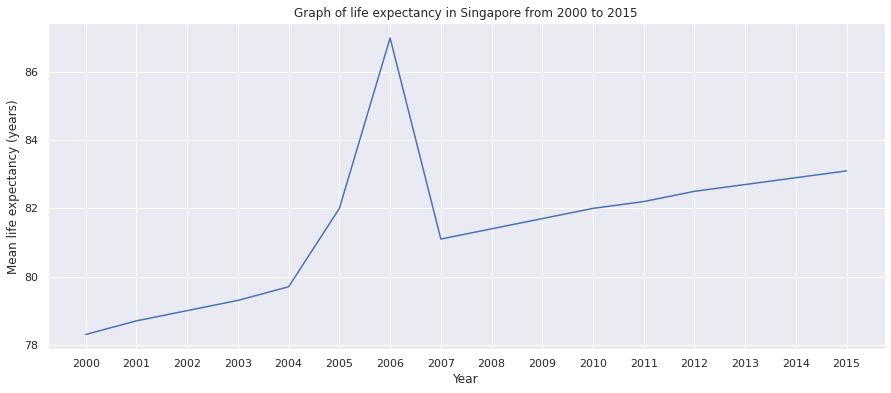

In [60]:
q3_1 = plt.figure(figsize = (15, 6))
q3_1 = plt.title('Graph of life expectancy in Singapore from 2000 to 2015')
q3_1 = sns.lineplot(x = 'Year', y = 'Life expectancy', data = sg)
q3_1.set_xticks(sg['Year'].unique())
q3_1.set_ylabel('Mean life expectancy (years)')

q3_1

To display two lines in a single plot, we have to make use of the `melt` function again. `melt` is applied to `sg` with `Year` as the identifier variable and `Adult mortality` and `Infant deaths` as value variables. Like in **Question 2**, the column labels and variable names are renamed for consistency and clarity.

In [61]:
sg_melted = pd.melt(sg, id_vars = 'Year', value_vars = ['Adult mortality', 'Infant deaths'])

sg_melted.rename(columns = {'country': 'Country',
                            'variable': 'Statistic',
                            'value': 'Value'},
                 inplace = True)

sg_melted['Statistic'].replace({'Adult mortality': 'Adult mortality (per 1000 population)',
                                'Infant deaths': 'Infant deaths (per 1000 population)'},
                                inplace = True)

sg_melted

,Year,Statistic,Value
0,2000,Adult mortality (per 1000 population),78.000000
1,2001,Adult mortality (per 1000 population),76.000000
2,2002,Adult mortality (per 1000 population),74.000000
3,2003,Adult mortality (per 1000 population),73.000000
4,2004,Adult mortality (per 1000 population),71.000000
5,2005,Adult mortality (per 1000 population),69.000000
6,2006,Adult mortality (per 1000 population),66.000000
7,2007,Adult mortality (per 1000 population),65.000000
8,2008,Adult mortality (per 1000 population),64.000000
9,2009,Adult mortality (per 1000 population),62.000000


Using the melted DataFrame, can now use `lineplot` to create a a graph with two lines. Like in the previous graph, the x-tick labels are manually set to show every year.

<AxesSubplot:title={'center':'Graph of adult mortality and infant deaths in Singapore from 2000 to 2015'}, xlabel='Year', ylabel='Value'>

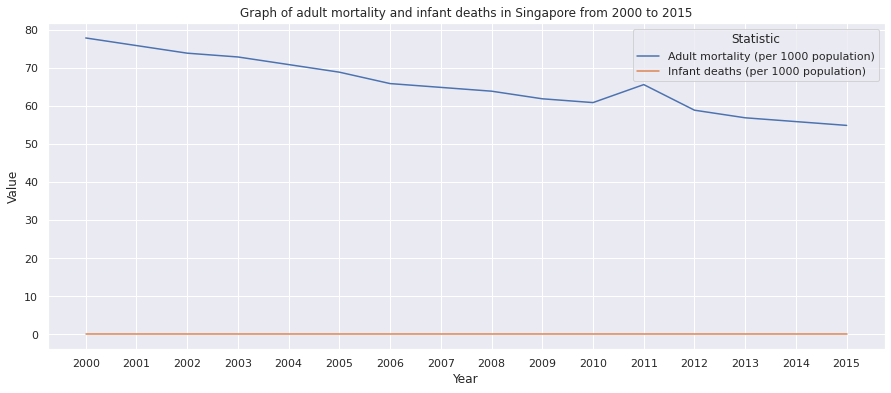

In [62]:
q3_2 = plt.figure(figsize = (15, 6))
q3_2 = plt.title('Graph of adult mortality and infant deaths in Singapore from 2000 to 2015')
q3_2 = sns.lineplot(x = 'Year', y = 'Value', hue = 'Statistic', data = sg_melted)
q3_2.set_xticks(sg['Year'].unique())

q3_2

### Explanation

The line graph titled `Graph of life expectancy in Singapore from 2000 to 2015` would be useful to study the advancement of healthcare and the welfare of citizens in Singapore from the year 2000 to 2015. These are major contributing factors of life expectancy. However, this graph alone can only provide a very general visualisation, and may not even be perfectly accurate (suggested by the outlier value for the year 2006). For a more insightful visualisation, plots for other metrics should be included as well.

Based on the graph titled `Graph of adult mortality and infant deaths in Singapore from 2000 to 2015`, life expectancy in Singapore increases as the adult mortality rate decreases. Logically, the same can be said about infant deaths, but according to this dataset, Singapore registered zero infant deaths from 2000 to 2015, meaning no relationship can technically be drawn between this and life expectancy. This can either be an impressive medical feat on Singapore's part, or the data has simply been erroneously omitted from the dataset. Other than providing insight to the growth of healthcare in Singapore, this graph can be combined with the previous graph to present a strong visualisation of how the reduction in the adult mortality rate contributes to increasing life expectancy.

## Conclusion

The analysis of data from these three datasets provided us with some knowledge about the life expectancies, populations and GDP of Southeast Asian countries. As a summary, Southeast Asia is mostly still a developing region of the world, with Singapore being the sole developed country and therefore having the highest life expectancy as well as GDP per capita. Fortunately, life expectancy in all Southeast Asian countries generally increases with time. Regardless of the rate of increase, this is a good sign that all countries in this region are seeing advancement in healthcare.

In addition, this assignment was a great opportunity to practise wrangling and visualing real-world data for the first time in the course of this unit. It was a fun way to experience the powerful tools Python has to offer in the field of data science.